<a href="https://colab.research.google.com/github/Bahaakhalled/Car-Price-Prediction/blob/main/Incomp-CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'> Car Project Using Linear Regression</h1>

# Business Problem

<b>Predicting Car Prices Using Linear Regression</b>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt


# Import Dataset

In [ ]:
data1 = pd.read_csv('Car details v3.csv')

In [ ]:
data1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
data2=files.upload()

In [ ]:
data2=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
cars=pd.concat([data1,data2])

In [ ]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
cars.shape

(12468, 13)

In [ ]:
cars.describe()

,year,selling_price,km_driven,seats
count,12468.000000,1.246800e+04,1.246800e+04,7907.000000
mean,2013.555743,5.915773e+05,6.856508e+04,5.416719
std,4.118485,7.377876e+05,5.333721e+04,0.959588
min,1983.000000,2.000000e+04,1.000000e+00,2.000000
25%,2011.000000,2.400000e+05,3.500000e+04,5.000000
50%,2014.000000,4.200000e+05,6.000000e+04,5.000000
75%,2017.000000,6.500000e+05,9.000000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12468 entries, 0 to 4339
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           12468 non-null  object 
 1   year           12468 non-null  int64  
 2   selling_price  12468 non-null  int64  
 3   km_driven      12468 non-null  int64  
 4   fuel           12468 non-null  object 
 5   seller_type    12468 non-null  object 
 6   transmission   12468 non-null  object 
 7   owner          12468 non-null  object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 1.3+ MB


In [ ]:
total_cells=np.product(cars.shape)
total_missing=cars.isnull().sum().sum()
percent_missing=int((total_missing / total_cells)*100)
print(str(percent_missing) + '% of the data is missing')

14% of the data is missing


In [ ]:
cars.fuel.value_counts()

Diesel      6555
Petrol      5754
CNG           97
LPG           61
Electric       1
Name: fuel, dtype: int64

In [ ]:
cars=cars.drop(cars.loc[cars.fuel=='Electric'].index)

In [ ]:
cars.fuel.value_counts()

Diesel    6555
Petrol    5753
CNG         97
LPG         61
Name: fuel, dtype: int64

In [ ]:
cars.name.unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Hyundai Verna CRDi 1.6 AT EX',
       'Chevrolet Spark 1.0 LT BS3', 'Tata Nano XM'], dtype=object)

In [ ]:
cars['Brand']=cars.name.map(lambda m:m.split(' ')[0])

In [ ]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


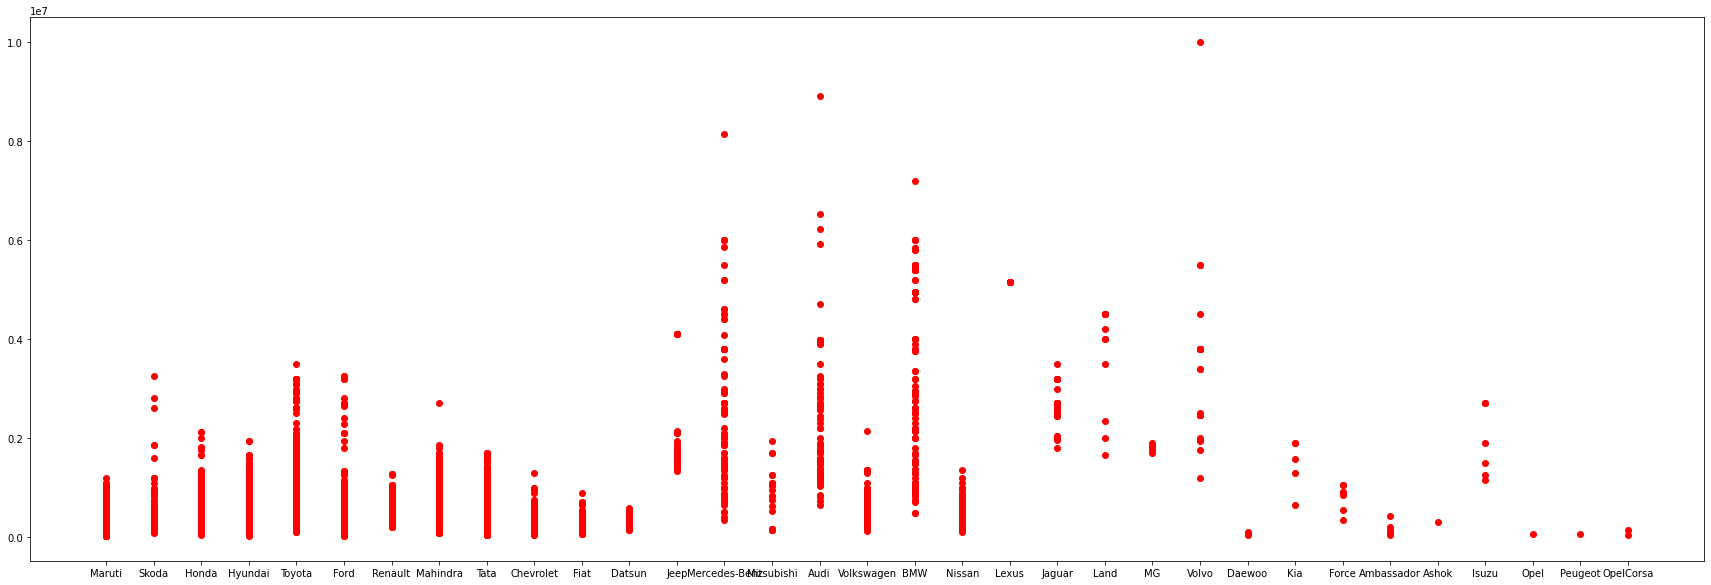

In [ ]:
plt.rcParams["figure.figsize"] = (30,10)
plt.scatter(cars['Brand'],cars['selling_price'],marker='o',c='r')
#plt.figure(figsize=(20 , 10))
#plt.show()

In [ ]:
cars['Brand']=cars.Brand.replace('OpelCorsa','Opel')

In [ ]:
cars['Brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

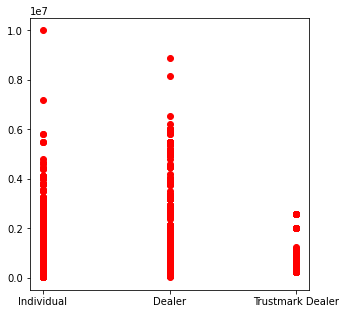

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(cars['seller_type'],cars['selling_price'],marker='o',c='r')

In [ ]:
cars.seller_type.value_counts()

Individual          10009
Dealer               2119
Trustmark Dealer      338
Name: seller_type, dtype: int64

In [ ]:
cars.loc[cars['seller_type']=='Trustmark Dealer'].Brand.value_counts()

Maruti      124
Toyota      112
Honda        74
Hyundai      21
Ford          2
Renault       2
Skoda         1
Nissan        1
Mahindra      1
Name: Brand, dtype: int64

In [ ]:
cars.owner.value_counts()

First Owner             8120
Second Owner            3210
Third Owner              859
Fourth & Above Owner     255
Test Drive Car            22
Name: owner, dtype: int64

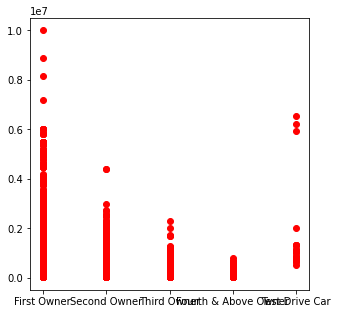

In [ ]:
plt.scatter(cars['owner'],cars['selling_price'],marker='o',c='r')

In [ ]:
cars.groupby('owner').mean()

,year,selling_price,km_driven,seats
owner,,,,
First Owner,2014.982635,7.188305e+05,56985.412685,5.392021
Fourth & Above Owner,2007.905882,2.093235e+05,103899.937255,5.468750
Second Owner,2011.438629,3.760822e+05,87086.946417,5.472980
Test Drive Car,2019.409091,1.738273e+06,6536.000000,5.000000
Third Owner,2009.519208,2.788692e+05,99908.653085,5.435294


In [ ]:
cars['seats']=cars['seats'].fillna(cars['seats'].mode()[0])

In [ ]:
cars.seats.value_counts()

5.0     10813
7.0      1120
8.0       236
4.0       133
9.0        80
6.0        62
10.0       19
2.0         2
14.0        1
Name: seats, dtype: int64

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12466 entries, 0 to 4339
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           12466 non-null  object 
 1   year           12466 non-null  int64  
 2   selling_price  12466 non-null  int64  
 3   km_driven      12466 non-null  int64  
 4   fuel           12466 non-null  object 
 5   seller_type    12466 non-null  object 
 6   transmission   12466 non-null  object 
 7   owner          12466 non-null  object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7912 non-null   object 
 11  torque         7905 non-null   object 
 12  seats          12466 non-null  float64
 13  Brand          12466 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 1.4+ MB


NameError: ignored